In [145]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import speech_recognition as sr
import pandas as pd


In [60]:
data_folder = "C:/Users/SHUBHAM SAINI/HackPrinceton-2021/Dataset"
data_folder2 = "C:/Users/SHUBHAM SAINI/HackPrinceton-2021/TressDataSet"
test_folder = "C:/Users/SHUBHAM SAINI/HackPrinceton-2021/TestData"
folders = os.listdir(data_folder)

In [4]:
emotions = {
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
classes = {
  'calm':'calm',
  'happy':'happy',
  'sad':'sad',
  'angry':'angry',
  'fearful':'fearful',
  'surprised':'surprised'
}

unobserved_emotions = ['neutral', 'disgust']

In [32]:

def noise(data):
    noise_amp = np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

In [89]:
def extract_feature(file_name, **kwargs):
    
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(y=X))
            #print(file_name)
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [90]:
def load_data(test_size = 0.2):
    x,y = [],[]
    for file in glob.glob(data_folder+"/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion in unobserved_emotions:
            continue
        feature = extract_feature(file,  mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    for file in glob.glob(data_folder2+"/*.wav"):
        file_name = os.path.basename(file)
        emotion = file_name.split("_")[2]
        print(file_name + "+" + emotion)
        if emotion in unobserved_emotions:
            continue
        feature = extract_feature(file,  mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)

In [91]:
x_train,x_test,y_train,y_test = load_data(test_size = 0.20)

OAF_back_angry.wav+angry.wav
OAF_back_disgust.wav+disgust.wav
OAF_back_fear.wav+fear.wav
OAF_back_happy.wav+happy.wav
OAF_back_neutral.wav+neutral.wav
OAF_back_ps.wav+ps.wav
OAF_back_sad.wav+sad.wav
OAF_bar_angry.wav+angry.wav
OAF_bar_disgust.wav+disgust.wav
OAF_bar_fear.wav+fear.wav
OAF_bar_happy.wav+happy.wav
OAF_bar_neutral.wav+neutral.wav
OAF_bar_ps.wav+ps.wav
OAF_bar_sad.wav+sad.wav
OAF_base_angry.wav+angry.wav
OAF_base_disgust.wav+disgust.wav
OAF_base_fear.wav+fear.wav
OAF_base_happy.wav+happy.wav
OAF_base_neutral.wav+neutral.wav
OAF_base_ps.wav+ps.wav
OAF_base_sad.wav+sad.wav
OAF_bath_angry.wav+angry.wav
OAF_bath_disgust.wav+disgust.wav
OAF_bath_fear.wav+fear.wav
OAF_bath_happy.wav+happy.wav
OAF_bath_neutral.wav+neutral.wav
OAF_bath_ps.wav+ps.wav
OAF_bath_sad.wav+sad.wav
OAF_bean_angry.wav+angry.wav
OAF_bean_disgust.wav+disgust.wav
OAF_bean_fear.wav+fear.wav
OAF_bean_happy.wav+happy.wav
OAF_bean_neutral.wav+neutral.wav
OAF_bean_ps.wav+ps.wav
OAF_bean_sad.wav+sad.wav
OAF_beg_angr

OAF_five_fear.wav+fear.wav
OAF_five_happy.wav+happy.wav
OAF_five_neutral.wav+neutral.wav
OAF_five_ps.wav+ps.wav
OAF_five_sad.wav+sad.wav
OAF_food_angry.wav+angry.wav
OAF_food_disgust.wav+disgust.wav
OAF_food_fear.wav+fear.wav
OAF_food_happy.wav+happy.wav
OAF_food_neutral.wav+neutral.wav
OAF_food_ps.wav+ps.wav
OAF_food_sad.wav+sad.wav
OAF_gap_angry.wav+angry.wav
OAF_gap_disgust.wav+disgust.wav
OAF_gap_fear.wav+fear.wav
OAF_gap_happy.wav+happy.wav
OAF_gap_neutral.wav+neutral.wav
OAF_gap_ps.wav+ps.wav
OAF_gap_sad.wav+sad.wav
OAF_gas_angry.wav+angry.wav
OAF_gas_disgust.wav+disgust.wav
OAF_gas_fear.wav+fear.wav
OAF_gas_happy.wav+happy.wav
OAF_gas_neutral.wav+neutral.wav
OAF_gas_ps.wav+ps.wav
OAF_gas_sad.wav+sad.wav
OAF_gaze_angry.wav+angry.wav
OAF_gaze_disgust.wav+disgust.wav
OAF_gaze_fear.wav+fear.wav
OAF_gaze_happy.wav+happy.wav
OAF_gaze_neutral.wav+neutral.wav
OAF_gaze_ps.wav+ps.wav
OAF_gaze_sad.wav+sad.wav
OAF_germ_angry.wav+angry.wav
OAF_germ_disgust.wav+disgust.wav
OAF_germ_fear.wav+f

OAF_learn_ps.wav+ps.wav
OAF_learn_sad.wav+sad.wav
OAF_lease_angry.wav+angry.wav
OAF_lease_disgust.wav+disgust.wav
OAF_lease_fear.wav+fear.wav
OAF_lease_happy.wav+happy.wav
OAF_lease_neutral.wav+neutral.wav
OAF_lease_ps.wav+ps.wav
OAF_lease_sad.wav+sad.wav
OAF_lid_angry.wav+angry.wav
OAF_lid_disgust.wav+disgust.wav
OAF_lid_fear.wav+fear.wav
OAF_lid_happy.wav+happy.wav
OAF_lid_neutral.wav+neutral.wav
OAF_lid_ps.wav+ps.wav
OAF_lid_sad.wav+sad.wav
OAF_life_angry.wav+angry.wav
OAF_life_disgust.wav+disgust.wav
OAF_life_fear.wav+fear.wav
OAF_life_happy.wav+happy.wav
OAF_life_neutral.wav+neutral.wav
OAF_life_ps.wav+ps.wav
OAF_life_sad.wav+sad.wav
OAF_limb_angry.wav+angry.wav
OAF_limb_disgust.wav+disgust.wav
OAF_limb_fear.wav+fear.wav
OAF_limb_happy.wav+happy.wav
OAF_limb_neutral.wav+neutral.wav
OAF_limb_ps.wav+ps.wav
OAF_limb_sad.wav+sad.wav
OAF_live_angry.wav+angry.wav
OAF_live_disgust.wav+disgust.wav
OAF_live_fear.wav+fear.wav
OAF_live_happy.wav+happy.wav
OAF_live_neutral.wav+neutral.wav
OAF

OAF_pole_happy.wav+happy.wav
OAF_pole_neutral.wav+neutral.wav
OAF_pole_ps.wav+ps.wav
OAF_pole_sad.wav+sad.wav
OAF_pool_angry.wav+angry.wav
OAF_pool_disgust.wav+disgust.wav
OAF_pool_fear.wav+fear.wav
OAF_pool_happy.wav+happy.wav
OAF_pool_neutral.wav+neutral.wav
OAF_pool_ps.wav+ps.wav
OAF_pool_sad.wav+sad.wav
OAF_puff_angry.wav+angry.wav
OAF_puff_disgust.wav+disgust.wav
OAF_puff_fear.wav+fear.wav
OAF_puff_happy.wav+happy.wav
OAF_puff_neutral.wav+neutral.wav
OAF_puff_ps.wav+ps.wav
OAF_puff_sad.wav+sad.wav
OAF_rag_angry.wav+angry.wav
OAF_rag_disgust.wav+disgust.wav
OAF_rag_fear.wav+fear.wav
OAF_rag_happy.wav+happy.wav
OAF_rag_neutral.wav+neutral.wav
OAF_rag_ps.wav+ps.wav
OAF_rag_sad.wav+sad.wav
OAF_raid_angry.wav+angry.wav
OAF_raid_disgust.wav+disgust.wav
OAF_raid_fear.wav+fear.wav
OAF_raid_happy.wav+happy.wav
OAF_raid_neutral.wav+neutral.wav
OAF_raid_ps.wav+ps.wav
OAF_raid_sad.wav+sad.wav
OAF_rain_angry.wav+angry.wav
OAF_rain_disgust.wav+disgust.wav
OAF_rain_fear.wav+fear.wav
OAF_rain_hap

OAF_tape_sad.wav+sad.wav
OAF_team_angry.wav+angry.wav
OAF_team_disgust.wav+disgust.wav
OAF_team_fear.wav+fear.wav
OAF_team_happy.wav+happy.wav
OAF_team_neutral.wav+neutral.wav
OAF_team_ps.wav+ps.wav
OAF_team_sad.wav+sad.wav
OAF_tell_angry.wav+angry.wav
OAF_tell_disgust.wav+disgust.wav
OAF_tell_fear.wav+fear.wav
OAF_tell_happy.wav+happy.wav
OAF_tell_neutral.wav+neutral.wav
OAF_tell_ps.wav+ps.wav
OAF_tell_sad.wav+sad.wav
OAF_thin_angry.wav+angry.wav
OAF_thin_disgust.wav+disgust.wav
OAF_thin_fear.wav+fear.wav
OAF_thin_happy.wav+happy.wav
OAF_thin_neutral.wav+neutral.wav
OAF_thin_ps.wav+ps.wav
OAF_thin_sad.wav+sad.wav
OAF_third_angry.wav+angry.wav
OAF_third_disgust.wav+disgust.wav
OAF_third_fear.wav+fear.wav
OAF_third_happy.wav+happy.wav
OAF_third_neutral.wav+neutral.wav
OAF_third_ps.wav+ps.wav
OAF_third_sad.wav+sad.wav
OAF_thought_angry.wav+angry.wav
OAF_thought_disgust.wav+disgust.wav
OAF_thought_fear.wav+fear.wav
OAF_thought_happy.wav+happy.wav
OAF_thought_neutral.wav+neutral.wav
OAF_th

YAF_bone_angry.wav+angry.wav
YAF_bone_disgust.wav+disgust.wav
YAF_bone_fear.wav+fear.wav
YAF_bone_happy.wav+happy.wav
YAF_bone_neutral.wav+neutral.wav
YAF_bone_ps.wav+ps.wav
YAF_bone_sad.wav+sad.wav
YAF_book_angry.wav+angry.wav
YAF_book_disgust.wav+disgust.wav
YAF_book_fear.wav+fear.wav
YAF_book_happy.wav+happy.wav
YAF_book_neutral.wav+neutral.wav
YAF_book_ps.wav+ps.wav
YAF_book_sad.wav+sad.wav
YAF_bought_angry.wav+angry.wav
YAF_bought_disgust.wav+disgust.wav
YAF_bought_fear.wav+fear.wav
YAF_bought_happy.wav+happy.wav
YAF_bought_neutral.wav+neutral.wav
YAF_bought_ps.wav+ps.wav
YAF_bought_sad.wav+sad.wav
YAF_burn_angry.wav+angry.wav
YAF_burn_disgust.wav+disgust.wav
YAF_burn_fear.wav+fear.wav
YAF_burn_happy.wav+happy.wav
YAF_burn_neutral.wav+neutral.wav
YAF_burn_ps.wav+ps.wav
YAF_burn_sad.wav+sad.wav
YAF_cab_angry.wav+angry.wav
YAF_cab_disgust.wav+disgust.wav
YAF_cab_fear.wav+fear.wav
YAF_cab_happy.wav+happy.wav
YAF_cab_neutral.wav+neutral.wav
YAF_cab_ps.wav+ps.wav
YAF_cab_sad.wav+sad.wa

YAF_gin_neutral.wav+neutral.wav
YAF_gin_ps.wav+ps.wav
YAF_gin_sad.wav+sad.wav
YAF_goal_angry.wav+angry.wav
YAF_goal_disgust.wav+disgust.wav
YAF_goal_fear.wav+fear.wav
YAF_goal_happy.wav+happy.wav
YAF_goal_neutral.wav+neutral.wav
YAF_goal_ps.wav+ps.wav
YAF_goal_sad.wav+sad.wav
YAF_good_angry.wav+angry.wav
YAF_good_disgust.wav+disgust.wav
YAF_good_fear.wav+fear.wav
YAF_good_happy.wav+happy.wav
YAF_good_neutral.wav+neutral.wav
YAF_good_ps.wav+ps.wav
YAF_good_sad.wav+sad.wav
YAF_goose_angry.wav+angry.wav
YAF_goose_disgust.wav+disgust.wav
YAF_goose_fear.wav+fear.wav
YAF_goose_happy.wav+happy.wav
YAF_goose_neutral.wav+neutral.wav
YAF_goose_ps.wav+ps.wav
YAF_goose_sad.wav+sad.wav
YAF_gun_angry.wav+angry.wav
YAF_gun_disgust.wav+disgust.wav
YAF_gun_fear.wav+fear.wav
YAF_gun_happy.wav+happy.wav
YAF_gun_neutral.wav+neutral.wav
YAF_gun_ps.wav+ps.wav
YAF_gun_sad.wav+sad.wav
YAF_half_angry.wav+angry.wav
YAF_half_disgust.wav+disgust.wav
YAF_half_fear.wav+fear.wav
YAF_half_happy.wav+happy.wav
YAF_half

YAF_lore_fear.wav+fear.wav
YAF_lore_happy.wav+happy.wav
YAF_lore_neutral.wav+neutral.wav
YAF_lore_ps.wav+ps.wav
YAF_lore_sad.wav+sad.wav
YAF_lose_angry.wav+angry.wav
YAF_lose_disgust.wav+disgust.wav
YAF_lose_fear.wav+fear.wav
YAF_lose_happy.wav+happy.wav
YAF_lose_neutral.wav+neutral.wav
YAF_lose_ps.wav+ps.wav
YAF_lose_sad.wav+sad.wav
YAF_lot_angry.wav+angry.wav
YAF_lot_disgust.wav+disgust.wav
YAF_lot_fear.wav+fear.wav
YAF_lot_happy.wav+happy.wav
YAF_lot_neutral.wav+neutral.wav
YAF_lot_ps.wav+ps.wav
YAF_lot_sad.wav+sad.wav
YAF_love_angry.wav+angry.wav
YAF_love_disgust.wav+disgust.wav
YAF_love_fear.wav+fear.wav
YAF_love_happy.wav+happy.wav
YAF_love_neutral.wav+neutral.wav
YAF_love_ps.wav+ps.wav
YAF_love_sad.wav+sad.wav
YAF_luck_angry.wav+angry.wav
YAF_luck_disgust.wav+disgust.wav
YAF_luck_fear.wav+fear.wav
YAF_luck_happy.wav+happy.wav
YAF_luck_neutral.wav+neutral.wav
YAF_luck_ps.wav+ps.wav
YAF_luck_sad.wav+sad.wav
YAF_make_angry.wav+angry.wav
YAF_make_disgust.wav+disgust.wav
YAF_make_fea

YAF_reach_disgust.wav+disgust.wav
YAF_reach_fear.wav+fear.wav
YAF_reach_happy.wav+happy.wav
YAF_reach_neutral.wav+neutral.wav
YAF_reach_ps.wav+ps.wav
YAF_reach_sad.wav+sad.wav
YAF_read_angry.wav+angry.wav
YAF_read_disgust.wav+disgust.wav
YAF_read_fear.wav+fear.wav
YAF_read_happy.wav+happy.wav
YAF_read_neutral.wav+neutral.wav
YAF_read_ps.wav+ps.wav
YAF_read_sad.wav+sad.wav
YAF_red_angry.wav+angry.wav
YAF_red_disgust.wav+disgust.wav
YAF_red_fear.wav+fear.wav
YAF_red_happy.wav+happy.wav
YAF_red_neutral.wav+neutral.wav
YAF_red_ps.wav+ps.wav
YAF_red_sad.wav+sad.wav
YAF_ring_angry.wav+angry.wav
YAF_ring_disgust.wav+disgust.wav
YAF_ring_fear.wav+fear.wav
YAF_ring_happy.wav+happy.wav
YAF_ring_neutral.wav+neutral.wav
YAF_ring_ps.wav+ps.wav
YAF_ring_sad.wav+sad.wav
YAF_ripe_angry.wav+angry.wav
YAF_ripe_disgust.wav+disgust.wav
YAF_ripe_fear.wav+fear.wav
YAF_ripe_happy.wav+happy.wav
YAF_ripe_neutral.wav+neutral.wav
YAF_ripe_ps.wav+ps.wav
YAF_ripe_sad.wav+sad.wav
YAF_road_angry.wav+angry.wav
YAF_ro

YAF_tip_happy.wav+happy.wav
YAF_tip_neutral.wav+neutral.wav
YAF_tip_ps.wav+ps.wav
YAF_tip_sad.wav+sad.wav
YAF_tire_angry.wav+angry.wav
YAF_tire_disgust.wav+disgust.wav
YAF_tire_fear.wav+fear.wav
YAF_tire_happy.wav+happy.wav
YAF_tire_neutral.wav+neutral.wav
YAF_tire_ps.wav+ps.wav
YAF_tire_sad.wav+sad.wav
YAF_ton_angry.wav+angry.wav
YAF_ton_disgust.wav+disgust.wav
YAF_ton_fear.wav+fear.wav
YAF_ton_happy.wav+happy.wav
YAF_ton_neutral.wav+neutral.wav
YAF_ton_ps.wav+ps.wav
YAF_ton_sad.wav+sad.wav
YAF_tool_angry.wav+angry.wav
YAF_tool_disgust.wav+disgust.wav
YAF_tool_fear.wav+fear.wav
YAF_tool_happy.wav+happy.wav
YAF_tool_neutral.wav+neutral.wav
YAF_tool_ps.wav+ps.wav
YAF_tool_sad.wav+sad.wav
YAF_tough_angry.wav+angry.wav
YAF_tough_disgust.wav+disgust.wav
YAF_tough_fear.wav+fear.wav
YAF_tough_happy.wav+happy.wav
YAF_tough_neutral.wav+neutral.wav
YAF_tough_ps.wav+ps.wav
YAF_tough_sad.wav+sad.wav
YAF_turn_angry.wav+angry.wav
YAF_turn_disgust.wav+disgust.wav
YAF_turn_fear.wav+fear.wav
YAF_turn_

In [92]:
print((x_train.shape[0], x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')

(3046, 762)
Features extracted: 180


In [93]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(alpha = 0.01, batch_size = 32, hidden_layer_sizes = (64,32,32,16,8), learning_rate = 'adaptive', max_iter = 215)

In [95]:

MLP.fit(x_train, y_train)
train_pred = MLP.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, train_pred)
print("accuracy: %.2f%%" % (accuracy))
#get results


accuracy: 0.86%


C:\Users\SHUBHAM SAINI\anaconda3\envs\Deeplearning_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  warnings.warn(


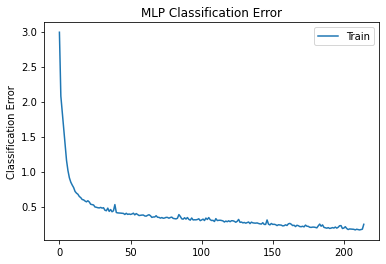

In [96]:
import matplotlib.pyplot as plt


x_axis = range(0, MLP.n_iter_)
fig, ax = plt.subplots()
ax.plot(x_axis, MLP.loss_curve_, label='Train')
ax.legend()
plt.ylabel('Classification Error')
plt.title('MLP Classification Error')
plt.show()

In [97]:
def load_data_test():
    x,y = [],[]
    for file in glob.glob(test_folder+"/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion in unobserved_emotions:
            continue
        feature = extract_feature(file,  mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return np.array(x), y

In [99]:
mlp_pred = MLP.predict(x_test)

In [100]:
hx_test, hy_test = load_data_test()
mlphy_pred = MLP.predict(hx_test)

In [101]:
accuracy = accuracy_score(y_true = hy_test, y_pred = mlphy_pred)
#Print the accuracy
print("Accuracy for MLP: {:.2f}%".format(accuracy*100))

Accuracy for MLP: 31.94%


In [102]:
print("mlp: {}".format(mlphy_pred))

mlp: ['calm' 'calm' 'surprised' 'calm' 'calm' 'calm' 'calm' 'calm' 'surprised'
 'calm' 'surprised' 'calm' 'surprised' 'disgust.wav' 'disgust.wav'
 'disgust.wav' 'calm' 'calm' 'calm' 'calm' 'calm' 'surprised' 'calm'
 'surprised' 'surprised' 'surprised' 'surprised' 'surprised' 'fearful'
 'fearful' 'happy' 'angry.wav' 'disgust.wav' 'disgust.wav' 'calm' 'calm'
 'ps.wav' 'happy' 'happy' 'happy' 'surprised' 'surprised' 'calm'
 'surprised' 'surprised' 'surprised' 'calm' 'calm' 'calm' 'calm' 'calm'
 'calm' 'calm' 'calm' 'calm' 'calm' 'sad' 'sad' 'sad' 'disgust.wav' 'sad'
 'ps.wav' 'ps.wav' 'sad' 'calm' 'calm' 'sad' 'calm' 'calm' 'calm' 'sad'
 'sad' 'angry' 'disgust.wav' 'calm' 'calm' 'fearful' 'fearful' 'angry'
 'angry' 'calm' 'surprised' 'calm' 'surprised' 'happy.wav' 'happy.wav'
 'fearful' 'fear.wav' 'surprised' 'calm' 'sad' 'sad' 'surprised' 'sad'
 'ps.wav' 'sad' 'sad' 'sad' 'sad' 'sad' 'sad' 'sad' 'sad' 'sad'
 'surprised' 'angry' 'surprised' 'sad' 'fearful' 'sad' 'angry' 'angry'
 'sad' 'sa

In [103]:
train_mlp = MLP.predict(x_train)


In [105]:
accuracy = accuracy_score(y_true = y_test, y_pred = mlp_pred)
#Print the accuracy
print("Accuracy for mlp: {:.2f}%".format(accuracy*100))

Accuracy for mlp: 86.09%


In [106]:
import keras
from keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils, to_categorical
from keras import losses, models, optimizers
from keras.activations import relu, softmax
# sklearn
from sklearn.preprocessing import LabelEncoder

In [107]:
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)

In [108]:
# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [125]:
print(X_train.shape)
print(lb.classes_)
type(lb.classes_)
lb.classes_[1] = 'angry'
lb.classes_[3] = 'disgust'
lb.classes_[4] = 'fear'
lb.classes_[7] = 'happy'
lb.classes_[8] = 'neutral'
lb.classes_[9] = 'ps'
lb.classes_[11] = 'sad'  
print(lb.classes_)


(3046, 180, 1)
['angry' 'angry' 'calm' 'disgust' 'fear' 'fearful' 'happy' 'happy'
 'neutral' 'ps' 'sad' 'sad' 'surprised']
['angry' 'angry' 'calm' 'disgust' 'fear' 'fearful' 'happy' 'happy'
 'neutral' 'ps' 'sad' 'sad' 'surprised']


In [126]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape


(3046, 180, 1, 1)

In [133]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(6)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(13)) # Target class number
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [134]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 180, 256)          2304      
_________________________________________________________________
activation_45 (Activation)   (None, 180, 256)          0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 180, 256)          524544    
_________________________________________________________________
batch_normalization_10 (Batc (None, 180, 256)          1024      
_________________________________________________________________
activation_46 (Activation)   (None, 180, 256)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 180, 256)          0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 30, 256)          

In [135]:

#train
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
#model_history=model.fit(X_train, y_train, batch_size=16, epochs=1000, validation_data=(X_test, y_test))
model_history=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
24/24 [==============================] - 26s 1s/step - loss: 2.5731 - accuracy: 0.1280 - val_loss: 2.5369 - val_accuracy: 0.1037
Epoch 2/100
24/24 [==============================] - 25s 1s/step - loss: 2.3032 - accuracy: 0.2866 - val_loss: 2.4844 - val_accuracy: 0.3819
Epoch 3/100
24/24 [==============================] - 25s 1s/step - loss: 2.0688 - accuracy: 0.4199 - val_loss: 2.4145 - val_accuracy: 0.5892
Epoch 4/100
24/24 [==============================] - 27s 1s/step - loss: 1.8578 - accuracy: 0.5036 - val_loss: 2.3273 - val_accuracy: 0.6430
Epoch 5/100
24/24 [==============================] - 25s 1s/step - loss: 1.6793 - accuracy: 0.5598 - val_loss: 2.2402 - val_accuracy: 0.6562
Epoch 6/100
24/24 [==============================] - 27s 1s/step - loss: 1.5163 - accuracy: 0.6149 - val_loss: 2.1400 - val_accuracy: 0.6417
Epoch 7/100
24/24 [==============================] - 28s 1s/step - loss: 1.3823 - accuracy: 0.6428 - val_loss: 2.0351 - val_accuracy: 0.6877
Epoch 8/100
2

Epoch 59/100
24/24 [==============================] - 29s 1s/step - loss: 0.3479 - accuracy: 0.8661 - val_loss: 0.4497 - val_accuracy: 0.8451
Epoch 60/100
24/24 [==============================] - 30s 1s/step - loss: 0.3480 - accuracy: 0.8749 - val_loss: 0.4337 - val_accuracy: 0.8556
Epoch 61/100
24/24 [==============================] - 28s 1s/step - loss: 0.3397 - accuracy: 0.8785 - val_loss: 0.4297 - val_accuracy: 0.8635
Epoch 62/100
24/24 [==============================] - 27s 1s/step - loss: 0.3404 - accuracy: 0.8710 - val_loss: 0.4276 - val_accuracy: 0.8727
Epoch 63/100
24/24 [==============================] - 28s 1s/step - loss: 0.3368 - accuracy: 0.8716 - val_loss: 0.4296 - val_accuracy: 0.8530
Epoch 64/100
24/24 [==============================] - 29s 1s/step - loss: 0.3311 - accuracy: 0.8815 - val_loss: 0.4269 - val_accuracy: 0.8596
Epoch 65/100
24/24 [==============================] - 28s 1s/step - loss: 0.3310 - accuracy: 0.8759 - val_loss: 0.4215 - val_accuracy: 0.8780
Epoch 

accuracy: 86.61%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


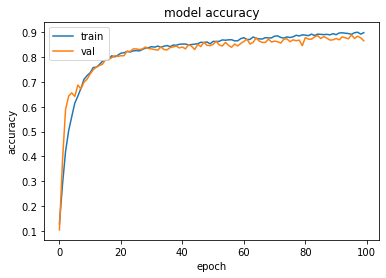

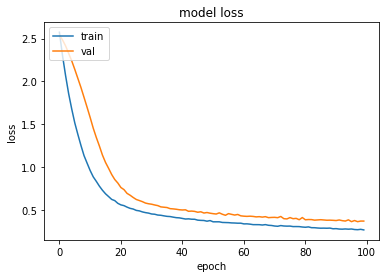

In [136]:
#predict
import matplotlib.pyplot as plt
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [147]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\SHUBHAM SAINI\saved_models\Emotion_Model.h5 
